In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DejaVu Sans'


In [7]:

data = pd.read_csv('quake.dat', header=None, skiprows=10, sep=',')
data.columns = ['Focal_depth', 'Latitude', 'Longitude', 'Richter']

print("Размер датасета:", data.shape)
print(data.describe())


Размер датасета: (2175, 4)
       Focal_depth     Latitude    Longitude      Richter
count  2175.000000  2175.000000  2175.000000  2175.000000
mean     74.404598     7.956832    54.842529     5.977011
std     116.541246    30.520067   118.923427     0.188846
min       0.000000   -66.490000  -179.960000     5.800000
25%      21.000000   -12.425000   -67.845000     5.800000
50%      39.000000     0.200000   122.090000     5.900000
75%      68.000000    36.480000   146.850000     6.100000
max     656.000000    78.150000   180.000000     6.900000


In [8]:
# Стандартизация данных (обязательно для K-means и EM)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

print("\nДанные стандартизированы.")
print("Форма стандартизированных данных:", data_scaled.shape)



Данные стандартизированы.
Форма стандартизированных данных: (2175, 4)


In [9]:
# Диапазон количества кластеров для тестирования
k_range = range(2, 11)

# Метрики для оценки качества K-means
kmeans_inertia = []
kmeans_silhouette = []
kmeans_davies_bouldin = []

# Словарь для хранения моделей K-means
kmeans_models = {}

print("\n" + "="*60)
print("АНАЛИЗ K-MEANS ДЛЯ РАЗЛИЧНОГО КОЛИЧЕСТВА КЛАСТЕРОВ")
print("="*60)

for k in k_range:
    # Создание модели K-means
    kmeans = KMeans(
        n_clusters=k,
        init='random',
        n_init=10,
        max_iter=10000,
        random_state=42
    )
    
    # Обучение модели
    kmeans.fit(data_scaled)
    kmeans_models[k] = kmeans
    
    # Получение меток кластеров
    labels = kmeans.labels_
    
    # Вычисление метрик
    inertia = kmeans.inertia_
    silhouette = silhouette_score(data_scaled, labels)
    davies_bouldin = davies_bouldin_score(data_scaled, labels)
    
    # Сохранение результатов
    kmeans_inertia.append(inertia)
    kmeans_silhouette.append(silhouette)
    kmeans_davies_bouldin.append(davies_bouldin)
    
    print(f"\nK = {k}:")
    print(f"  Инерция: {inertia:.2f}")
    print(f"  Коэффициент силуэта: {silhouette:.4f}")
    print(f"  Индекс Дэвиса-Болдина: {davies_bouldin:.4f}")
    print(f"  Размеры кластеров: {np.bincount(labels)}")



АНАЛИЗ K-MEANS ДЛЯ РАЗЛИЧНОГО КОЛИЧЕСТВА КЛАСТЕРОВ

K = 2:
  Инерция: 6640.69
  Коэффициент силуэта: 0.3222
  Индекс Дэвиса-Болдина: 1.4964
  Размеры кластеров: [ 661 1514]

K = 3:
  Инерция: 5051.46
  Коэффициент силуэта: 0.3522
  Индекс Дэвиса-Болдина: 1.1761
  Размеры кластеров: [1436  620  119]

K = 4:
  Инерция: 3962.42
  Коэффициент силуэта: 0.3360
  Индекс Дэвиса-Болдина: 1.0783
  Размеры кластеров: [ 117  547  468 1043]

K = 5:
  Инерция: 3148.48
  Коэффициент силуэта: 0.3430
  Индекс Дэвиса-Болдина: 0.9611
  Размеры кластеров: [114 707 312 422 620]

K = 6:
  Инерция: 2630.71
  Коэффициент силуэта: 0.3621
  Индекс Дэвиса-Болдина: 0.9047
  Размеры кластеров: [512 190 690 292 114 377]

K = 7:
  Инерция: 2362.17
  Коэффициент силуэта: 0.3694
  Индекс Дэвиса-Болдина: 0.9331
  Размеры кластеров: [339 680 498 114 178 110 256]

K = 8:
  Инерция: 2145.76
  Коэффициент силуэта: 0.3717
  Индекс Дэвиса-Болдина: 0.9448
  Размеры кластеров: [205 183 191 124 317 115 436 604]

K = 9:
  Инерц

In [10]:
# Метрики для оценки качества EM
em_silhouette = []
em_davies_bouldin = []
em_bic = []  # Байесовский информационный критерий
em_aic = []  # Информационный критерий Акаике

# Словарь для хранения моделей EM
em_models = {}

print("\n" + "="*60)
print("АНАЛИЗ EM (GAUSSIAN MIXTURE) ДЛЯ РАЗЛИЧНОГО КОЛИЧЕСТВА КЛАСТЕРОВ")
print("="*60)

for k in k_range:
    # Создание модели Gaussian Mixture (EM)
    gmm = GaussianMixture(
        n_components=k,
        max_iter=10000,
        random_state=42
    )
    
    # Обучение модели
    gmm.fit(data_scaled)
    em_models[k] = gmm
    
    # Получение меток кластеров (с максимальной вероятностью)
    labels = gmm.predict(data_scaled)
    
    # Вычисление метрик
    silhouette = silhouette_score(data_scaled, labels)
    davies_bouldin = davies_bouldin_score(data_scaled, labels)
    bic = gmm.bic(data_scaled)
    aic = gmm.aic(data_scaled)
    
    # Сохранение результатов
    em_silhouette.append(silhouette)
    em_davies_bouldin.append(davies_bouldin)
    em_bic.append(bic)
    em_aic.append(aic)
    
    print(f"\nK = {k}:")
    print(f"  Коэффициент силуэта: {silhouette:.4f}")
    print(f"  Индекс Дэвиса-Болдина: {davies_bouldin:.4f}")
    print(f"  BIC: {bic:.2f}")
    print(f"  AIC: {aic:.2f}")
    print(f"  Размеры кластеров: {np.bincount(labels)}")



АНАЛИЗ EM (GAUSSIAN MIXTURE) ДЛЯ РАЗЛИЧНОГО КОЛИЧЕСТВА КЛАСТЕРОВ

K = 2:
  Коэффициент силуэта: 0.3173
  Индекс Дэвиса-Болдина: 1.5185
  BIC: 22283.44
  AIC: 22118.58
  Размеры кластеров: [1493  682]

K = 3:
  Коэффициент силуэта: 0.1328
  Индекс Дэвиса-Болдина: 1.8767
  BIC: 19891.73
  AIC: 19641.60
  Размеры кластеров: [ 754  140 1281]

K = 4:
  Коэффициент силуэта: 0.2818
  Индекс Дэвиса-Болдина: 1.2282
  BIC: 18406.38
  AIC: 18070.98
  Размеры кластеров: [833 486 634 222]

K = 5:
  Коэффициент силуэта: 0.2692
  Индекс Дэвиса-Болдина: 1.2371
  BIC: 17408.78
  AIC: 16988.11
  Размеры кластеров: [709 406 594 246 220]

K = 6:
  Коэффициент силуэта: 0.2836
  Индекс Дэвиса-Болдина: 1.1759
  BIC: 17258.42
  AIC: 16752.47
  Размеры кластеров: [690 304 531 239 192 219]

K = 7:
  Коэффициент силуэта: 0.1970
  Индекс Дэвиса-Болдина: 1.4849
  BIC: 16815.58
  AIC: 16224.36
  Размеры кластеров: [320 310 441 252 186 257 409]

K = 8:
  Коэффициент силуэта: 0.1378
  Индекс Дэвиса-Болдина: 1.7727
 

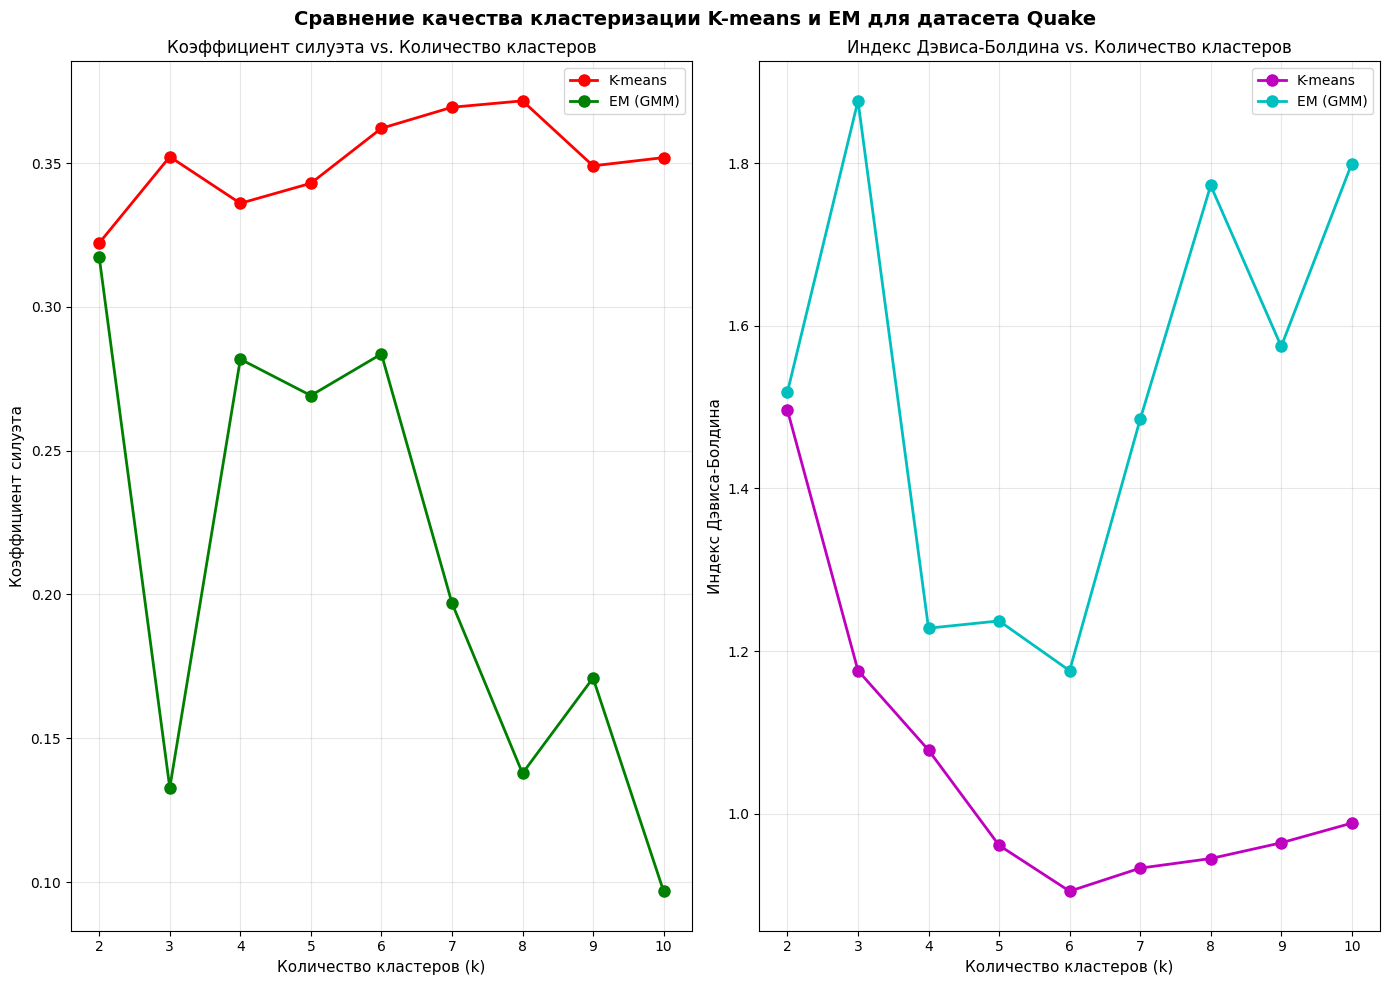

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 10))
fig.suptitle('Сравнение качества кластеризации K-means и EM для датасета Quake', 
             fontsize=14, fontweight='bold')

# График 2: Коэффициент силуэта (сравнение)
axes[0].plot(k_range, kmeans_silhouette, 'ro-', linewidth=2, markersize=8, label='K-means')
axes[0].plot(k_range, em_silhouette, 'go-', linewidth=2, markersize=8, label='EM (GMM)')
axes[0].set_xlabel('Количество кластеров (k)', fontsize=11)
axes[0].set_ylabel('Коэффициент силуэта', fontsize=11)
axes[0].set_title('Коэффициент силуэта vs. Количество кластеров', fontsize=12)
axes[0].grid(True, alpha=0.3)
axes[0,].set_xticks(k_range)
axes[0,].legend()

# График 3: Индекс Дэвиса-Болдина (сравнение)
axes[1].plot(k_range, kmeans_davies_bouldin, 'mo-', linewidth=2, markersize=8, label='K-means')
axes[1].plot(k_range, em_davies_bouldin, 'co-', linewidth=2, markersize=8, label='EM (GMM)')
axes[1].set_xlabel('Количество кластеров (k)', fontsize=11)
axes[1].set_ylabel('Индекс Дэвиса-Болдина', fontsize=11)
axes[1].set_title('Индекс Дэвиса-Болдина vs. Количество кластеров', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(k_range)
axes[1].legend()


plt.tight_layout()
plt.savefig('comparison_kmeans_em.png', dpi=300, bbox_inches='tight')
plt.show()


In [20]:
print("\n" + "="*60)
print("ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО КОЛИЧЕСТВА КЛАСТЕРОВ")
print("="*60)

# K-means
optimal_k_kmeans_sil = k_range[np.argmax(kmeans_silhouette)]
optimal_k_kmeans_db = k_range[np.argmin(kmeans_davies_bouldin)]

print("\nK-means:")
print(f"  По коэффициенту силуэта (максимум): k = {optimal_k_kmeans_sil}")
print(f"    Значение: {max(kmeans_silhouette):.4f}")
print(f"  По индексу Дэвиса-Болдина (минимум): k = {optimal_k_kmeans_db}")
print(f"    Значение: {min(kmeans_davies_bouldin):.4f}")

# EM (Gaussian Mixture)
optimal_k_em_sil = k_range[np.argmax(em_silhouette)]
optimal_k_em_db = k_range[np.argmin(em_davies_bouldin)]
optimal_k_em_bic = k_range[np.argmin(em_bic)]

print("\nEM (Gaussian Mixture):")
print(f"  По коэффициенту силуэта (максимум): k = {optimal_k_em_sil}")
print(f"    Значение: {max(em_silhouette):.4f}")
print(f"  По индексу Дэвиса-Болдина (минимум): k = {optimal_k_em_db}")
print(f"    Значение: {min(em_davies_bouldin):.4f}")



ОПРЕДЕЛЕНИЕ ОПТИМАЛЬНОГО КОЛИЧЕСТВА КЛАСТЕРОВ

K-means:
  По коэффициенту силуэта (максимум): k = 8
    Значение: 0.3717
  По индексу Дэвиса-Болдина (минимум): k = 6
    Значение: 0.9047

EM (Gaussian Mixture):
  По коэффициенту силуэта (максимум): k = 2
    Значение: 0.3173
  По индексу Дэвиса-Болдина (минимум): k = 6
    Значение: 1.1759


In [21]:
optimal_k = 6

print(f"\n\n{'='*60}")
print(f"ДЕТАЛЬНОЕ СРАВНЕНИЕ K-MEANS И EM ДЛЯ K = {optimal_k}")
print(f"{'='*60}")

# K-means
kmeans_model = kmeans_models[optimal_k]
kmeans_labels = kmeans_model.labels_
kmeans_centers = scaler.inverse_transform(kmeans_model.cluster_centers_)

# EM
em_model = em_models[optimal_k]
em_labels = em_model.predict(data_scaled)
em_means = scaler.inverse_transform(em_model.means_)

print("\n--- K-means ---")
print("Центры кластеров:")
kmeans_centers_df = pd.DataFrame(
    kmeans_centers,
    columns=['Focal_depth', 'Latitude', 'Longitude', 'Richter']
)
kmeans_centers_df.index = [f'Кластер {i+1}' for i in range(optimal_k)]
print(kmeans_centers_df.round(2))

print("\nРаспределение объектов:")
for i in range(optimal_k):
    size = np.sum(kmeans_labels == i)
    percentage = (size / len(kmeans_labels)) * 100
    print(f"  Кластер {i+1}: {size} ({percentage:.1f}%)")

print("\n--- EM (Gaussian Mixture) ---")
print("Средние значения компонент:")
em_means_df = pd.DataFrame(
    em_means,
    columns=['Focal_depth', 'Latitude', 'Longitude', 'Richter']
)
em_means_df.index = [f'Компонента {i+1}' for i in range(optimal_k)]
print(em_means_df.round(2))

print("\nРаспределение объектов:")
for i in range(optimal_k):
    size = np.sum(em_labels == i)
    percentage = (size / len(em_labels)) * 100
    print(f"  Компонента {i+1}: {size} ({percentage:.1f}%)")




ДЕТАЛЬНОЕ СРАВНЕНИЕ K-MEANS И EM ДЛЯ K = 6

--- K-means ---
Центры кластеров:
           Focal_depth  Latitude  Longitude  Richter
Кластер 1        38.32     40.54     113.04     5.92
Кластер 2        31.13     41.12    -127.22     5.95
Кластер 3        57.30     -7.66     139.21     5.90
Кластер 4        51.01     13.33      80.32     6.33
Кластер 5       517.84      0.96      47.80     5.96
Кластер 6        60.56    -26.49    -104.45     5.93

Распределение объектов:
  Кластер 1: 512 (23.5%)
  Кластер 2: 190 (8.7%)
  Кластер 3: 690 (31.7%)
  Кластер 4: 292 (13.4%)
  Кластер 5: 114 (5.2%)
  Кластер 6: 377 (17.3%)

--- EM (Gaussian Mixture) ---
Средние значения компонент:
              Focal_depth  Latitude  Longitude  Richter
Компонента 1        59.55     -5.54     142.87     5.95
Компонента 2        43.12    -29.91     -70.47     5.87
Компонента 3        27.45     40.00     113.16     5.94
Компонента 4       319.74      7.89      26.19     5.98
Компонента 5        27.46     37.76  

In [22]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

# Сравнение меток кластеров
ari = adjusted_rand_score(kmeans_labels, em_labels)
nmi = normalized_mutual_info_score(kmeans_labels, em_labels)

print(f"\n{'='*60}")
print("СРАВНЕНИЕ СОГЛАСОВАННОСТИ КЛАСТЕРИЗАЦИИ")
print(f"{'='*60}")
print(f"\nAdjusted Rand Index (ARI): {ari:.4f}")
print(f"Normalized Mutual Information (NMI): {nmi:.4f}")
print("\nИнтерпретация:")
if ari > 0.7:
    print("  Высокая согласованность между K-means и EM")
elif ari > 0.4:
    print("  Средняя согласованность между K-means и EM")
else:
    print("  Низкая согласованность между K-means и EM")



СРАВНЕНИЕ СОГЛАСОВАННОСТИ КЛАСТЕРИЗАЦИИ

Adjusted Rand Index (ARI): 0.6557
Normalized Mutual Information (NMI): 0.6408

Интерпретация:
  Средняя согласованность между K-means и EM


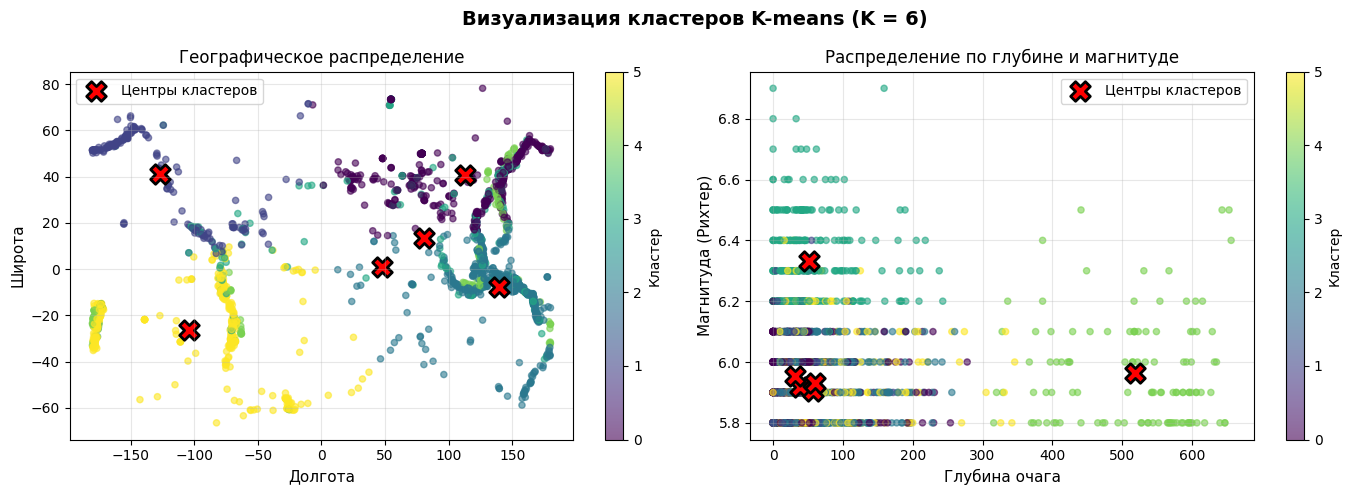

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'Визуализация кластеров K-means (K = {optimal_k})', 
             fontsize=14, fontweight='bold')

# График 1: Широта vs Долгота
scatter1 = axes[0].scatter(
    data['Longitude'], 
    data['Latitude'], 
    c=kmeans_labels, 
    cmap='viridis', 
    alpha=0.6, 
    s=20
)
axes[0].scatter(
    kmeans_centers_df['Longitude'], 
    kmeans_centers_df['Latitude'], 
    c='red', 
    marker='X', 
    s=200, 
    edgecolors='black', 
    linewidths=2,
    label='Центры кластеров'
)
axes[0].set_xlabel('Долгота', fontsize=11)
axes[0].set_ylabel('Широта', fontsize=11)
axes[0].set_title('Географическое распределение', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Кластер')

# График 2: Глубина vs Магнитуда
scatter2 = axes[1].scatter(
    data['Focal_depth'], 
    data['Richter'], 
    c=kmeans_labels, 
    cmap='viridis', 
    alpha=0.6, 
    s=20
)
axes[1].scatter(
    kmeans_centers_df['Focal_depth'], 
    kmeans_centers_df['Richter'], 
    c='red', 
    marker='X', 
    s=200, 
    edgecolors='black', 
    linewidths=2,
    label='Центры кластеров'
)
axes[1].set_xlabel('Глубина очага', fontsize=11)
axes[1].set_ylabel('Магнитуда (Рихтер)', fontsize=11)
axes[1].set_title('Распределение по глубине и магнитуде', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Кластер')

plt.tight_layout()
plt.savefig('kmeans_clusters_visualization.png', dpi=300, bbox_inches='tight')
plt.show()


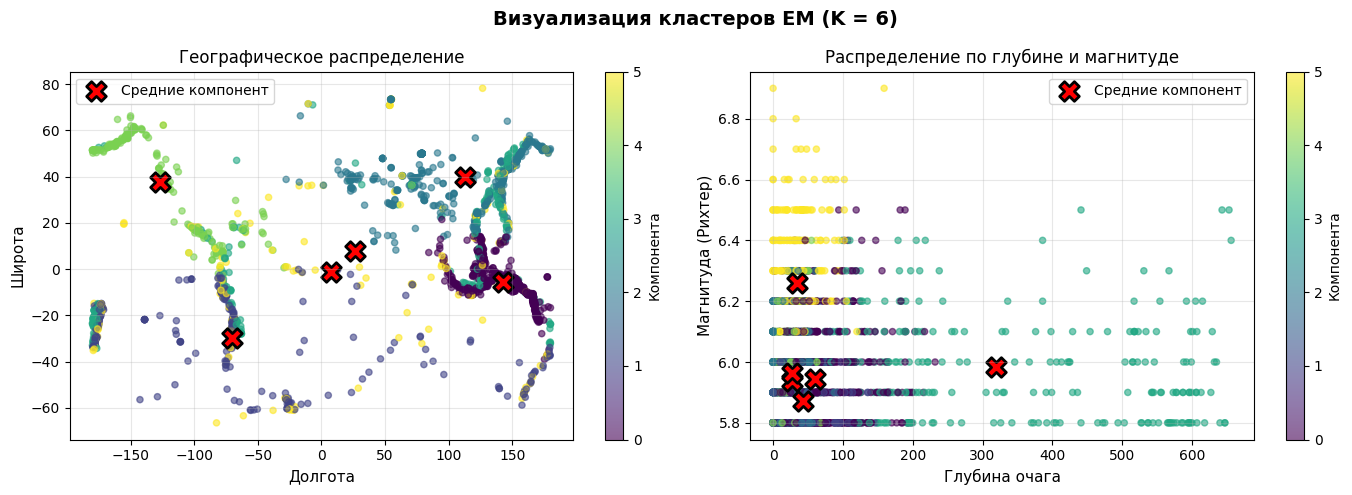

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle(f'Визуализация кластеров EM (K = {optimal_k})', 
             fontsize=14, fontweight='bold')

# График 1: Широта vs Долгота
scatter1 = axes[0].scatter(
    data['Longitude'], 
    data['Latitude'], 
    c=em_labels, 
    cmap='viridis', 
    alpha=0.6, 
    s=20
)
axes[0].scatter(
    em_means_df['Longitude'], 
    em_means_df['Latitude'], 
    c='red', 
    marker='X', 
    s=200, 
    edgecolors='black', 
    linewidths=2,
    label='Средние компонент'
)
axes[0].set_xlabel('Долгота', fontsize=11)
axes[0].set_ylabel('Широта', fontsize=11)
axes[0].set_title('Географическое распределение', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
plt.colorbar(scatter1, ax=axes[0], label='Компонента')

# График 2: Глубина vs Магнитуда
scatter2 = axes[1].scatter(
    data['Focal_depth'], 
    data['Richter'], 
    c=em_labels, 
    cmap='viridis', 
    alpha=0.6, 
    s=20
)
axes[1].scatter(
    em_means_df['Focal_depth'], 
    em_means_df['Richter'], 
    c='red', 
    marker='X', 
    s=200, 
    edgecolors='black', 
    linewidths=2,
    label='Средние компонент'
)
axes[1].set_xlabel('Глубина очага', fontsize=11)
axes[1].set_ylabel('Магнитуда (Рихтер)', fontsize=11)
axes[1].set_title('Распределение по глубине и магнитуде', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
plt.colorbar(scatter2, ax=axes[1], label='Компонента')

plt.tight_layout()
plt.savefig('em_clusters_visualization.png', dpi=300, bbox_inches='tight')
plt.show()


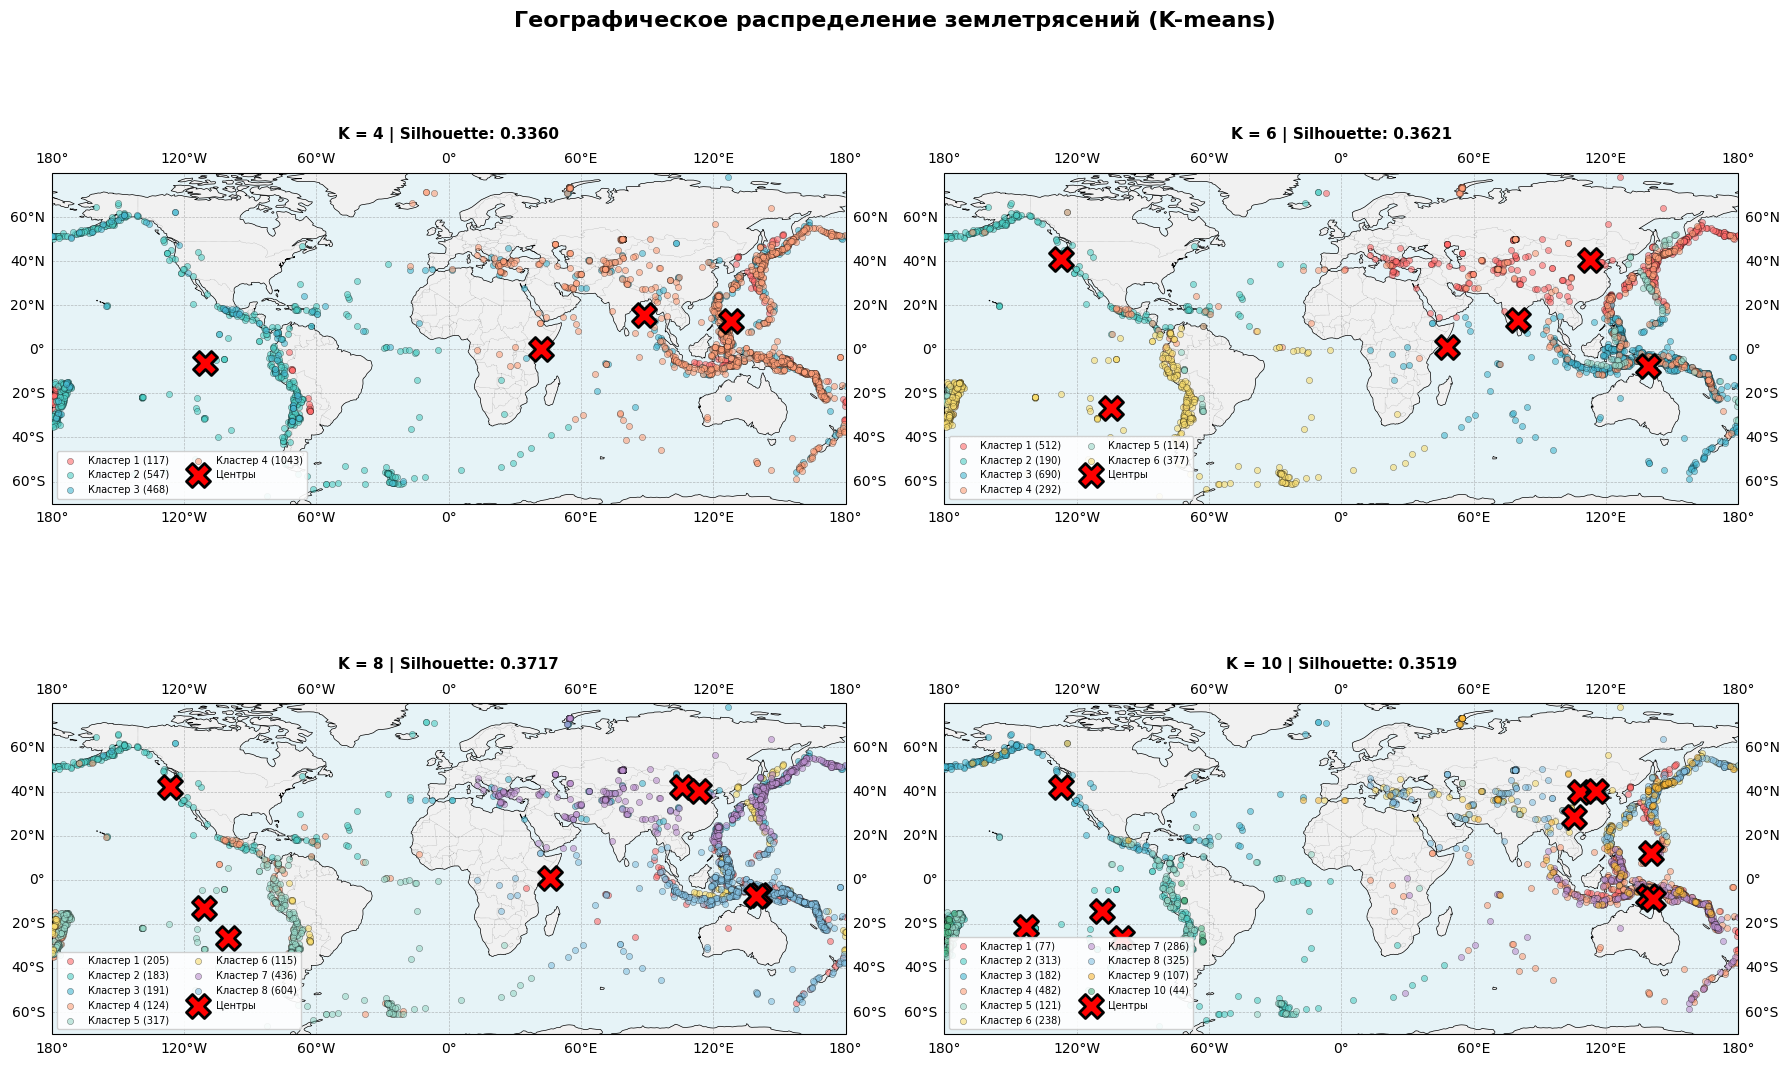

In [25]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Значения k для визуализации
k_values = [4, 6, 8, 10]

# Цветовая палитра
colors_palette = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', 
                  '#F7DC6F', '#BB8FCE', '#85C1E2', '#F8B739', '#52B788']

fig = plt.figure(figsize=(18, 12))
fig.suptitle('Географическое распределение землетрясений (K-means)', 
             fontsize=16, fontweight='bold')

for idx, k in enumerate(k_values, 1):
    ax = fig.add_subplot(2, 2, idx, projection=ccrs.PlateCarree())
    
    # Элементы карты
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3, linestyle=':', alpha=0.5)
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    
    model = kmeans_models[k]
    labels = model.labels_
    cluster_centers = scaler.inverse_transform(model.cluster_centers_)
    
    for cluster_id in range(k):
        cluster_mask = labels == cluster_id
        cluster_data = data[cluster_mask]
        
        ax.scatter(
            cluster_data['Longitude'], 
            cluster_data['Latitude'],
            c=colors_palette[cluster_id % len(colors_palette)],
            s=20,
            alpha=0.6,
            edgecolors='black',
            linewidths=0.3,
            label=f'Кластер {cluster_id + 1} ({len(cluster_data)})',
            transform=ccrs.PlateCarree(),
            zorder=3
        )
    
    ax.scatter(
        cluster_centers[:, 2], cluster_centers[:, 1],
        c='red', marker='X', s=300,
        edgecolors='black', linewidths=2,
        label='Центры', transform=ccrs.PlateCarree(), zorder=4
    )
    
    ax.set_extent([-180, 180, -70, 80], crs=ccrs.PlateCarree())
    ax.set_title(f'K = {k} | Silhouette: {kmeans_silhouette[k-2]:.4f}', 
                fontsize=11, fontweight='bold', pad=10)
    ax.legend(loc='lower left', fontsize=7, framealpha=0.9, ncol=2)

plt.tight_layout()
plt.savefig('world_map_kmeans.png', dpi=300, bbox_inches='tight')
plt.show()


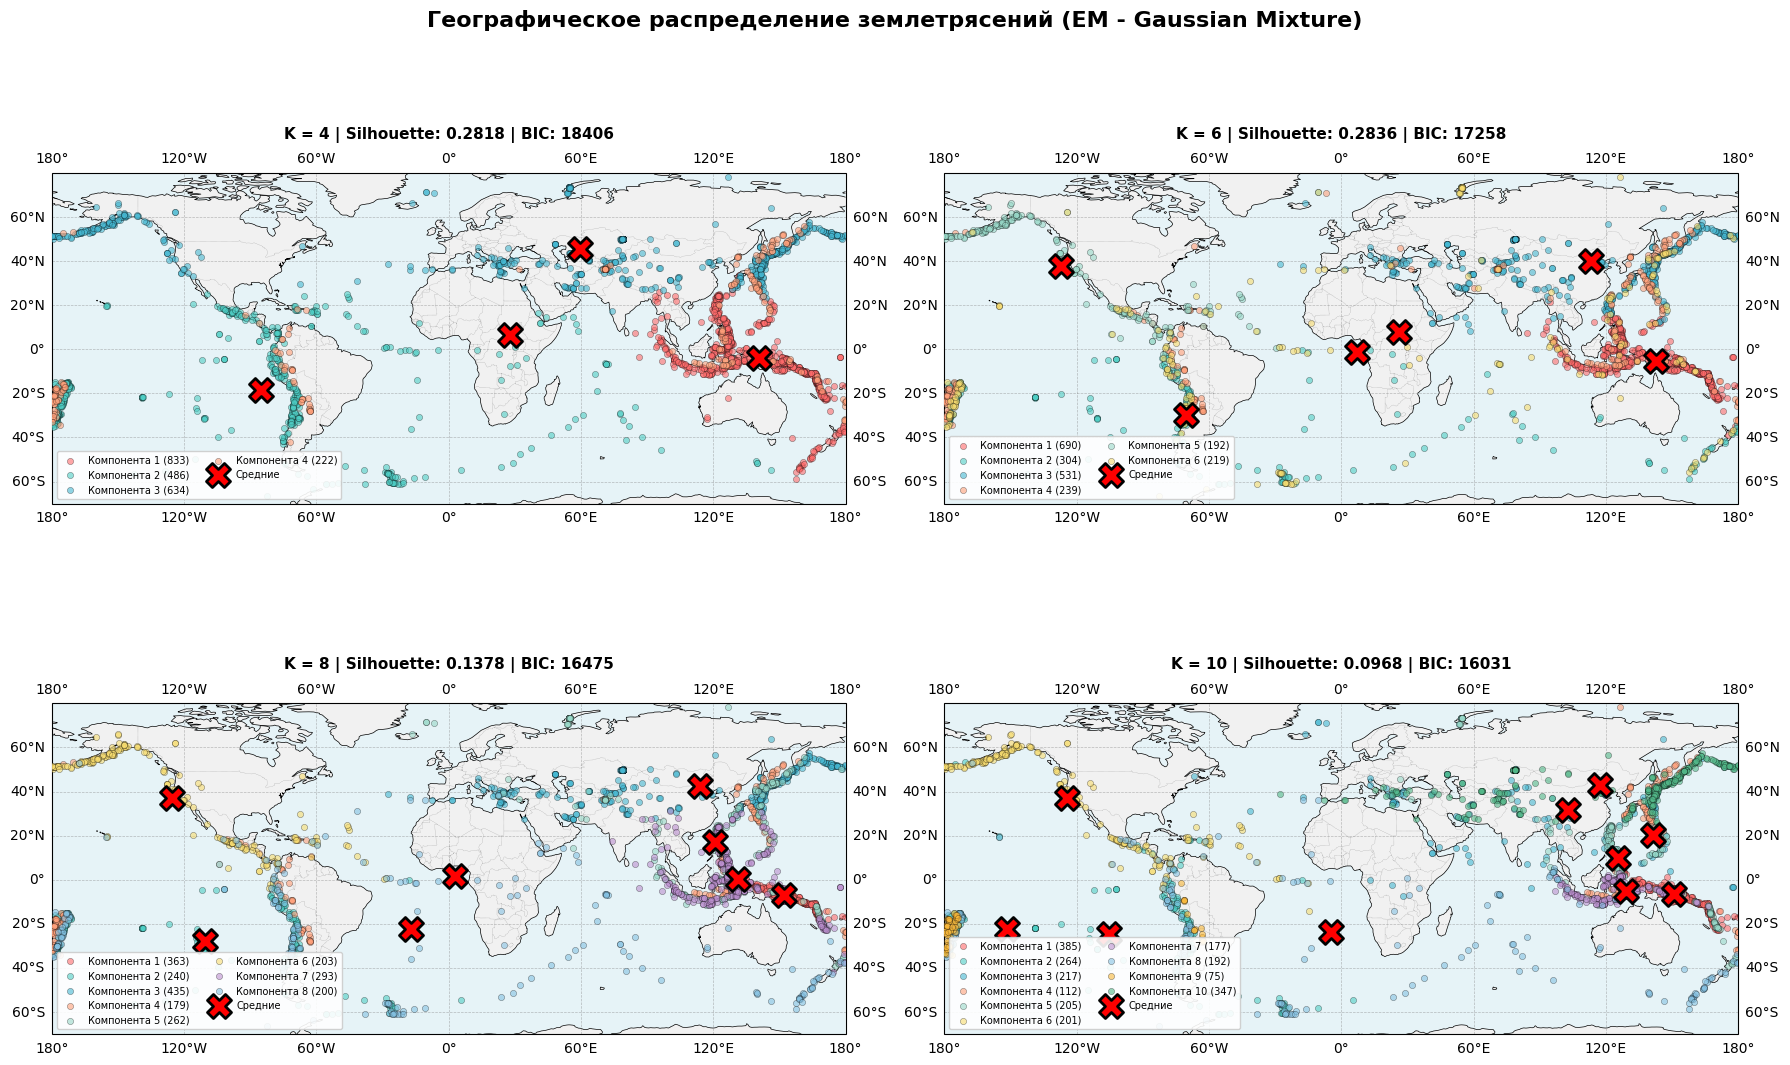


ГЕОГРАФИЧЕСКИЙ АНАЛИЗ КЛАСТЕРОВ EM

K = 4 компонент
Метрики качества:
  • Коэффициент силуэта: 0.2818
  • Индекс Дэвиса-Болдина: 1.2282
  • BIC: 18406.38
  • AIC: 18070.98

Распределение землетрясений по компонентам:

  Компонента 1:
    Размер: 833 землетрясений (38.3%)
    Среднее: Lat=-4.09°, Lon=140.84°
    Глубина: 56 м, Магнитуда: 5.97

  Компонента 2:
    Размер: 486 землетрясений (22.3%)
    Среднее: Lat=-18.56°, Lon=-85.29°
    Глубина: 40 м, Магнитуда: 5.98

  Компонента 3:
    Размер: 634 землетрясений (29.1%)
    Среднее: Lat=45.30°, Lon=59.68°
    Глубина: 26 м, Магнитуда: 5.99

  Компонента 4:
    Размер: 222 землетрясений (10.2%)
    Среднее: Lat=6.25°, Lon=27.82°
    Глубина: 339 м, Магнитуда: 5.98

K = 6 компонент
Метрики качества:
  • Коэффициент силуэта: 0.2836
  • Индекс Дэвиса-Болдина: 1.1759
  • BIC: 17258.42
  • AIC: 16752.47

Распределение землетрясений по компонентам:

  Компонента 1:
    Размер: 690 землетрясений (31.7%)
    Среднее: Lat=-5.54°, Lon=142.87°
 

In [26]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Значения k для визуализации
k_values = [4, 6, 8, 10]

# Цветовая палитра
colors_palette = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', 
                  '#F7DC6F', '#BB8FCE', '#85C1E2', '#F8B739', '#52B788']

fig = plt.figure(figsize=(18, 12))
fig.suptitle('Географическое распределение землетрясений (EM - Gaussian Mixture)', 
             fontsize=16, fontweight='bold')

for idx, k in enumerate(k_values, 1):
    ax = fig.add_subplot(2, 2, idx, projection=ccrs.PlateCarree())
    
    # Элементы карты
    ax.add_feature(cfeature.LAND, facecolor='lightgray', alpha=0.3)
    ax.add_feature(cfeature.OCEAN, facecolor='lightblue', alpha=0.3)
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linewidth=0.3, linestyle=':', alpha=0.5)
    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    
    # Получаем модель EM для данного k
    model = em_models[k]
    labels = model.predict(data_scaled)
    em_means = scaler.inverse_transform(model.means_)
    
    # Наносим точки землетрясений по компонентам
    for component_id in range(k):
        component_mask = labels == component_id
        component_data = data[component_mask]
        
        ax.scatter(
            component_data['Longitude'], 
            component_data['Latitude'],
            c=colors_palette[component_id % len(colors_palette)],
            s=20,
            alpha=0.6,
            edgecolors='black',
            linewidths=0.3,
            label=f'Компонента {component_id + 1} ({len(component_data)})',
            transform=ccrs.PlateCarree(),
            zorder=3
        )
    
    # Наносим средние значения компонент
    ax.scatter(
        em_means[:, 2],  # Longitude
        em_means[:, 1],  # Latitude
        c='red',
        marker='X',
        s=300,
        edgecolors='black',
        linewidths=2,
        label='Средние',
        transform=ccrs.PlateCarree(),
        zorder=4
    )
    
    # Устанавливаем границы карты
    ax.set_extent([-180, 180, -70, 80], crs=ccrs.PlateCarree())
    
    # Заголовок с метриками
    ax.set_title(f'K = {k} | Silhouette: {em_silhouette[k-2]:.4f} | BIC: {em_bic[k-2]:.0f}', 
                fontsize=11, fontweight='bold', pad=10)
    
    # Легенда
    ax.legend(loc='lower left', fontsize=7, framealpha=0.9, ncol=2)

plt.tight_layout()
plt.savefig('world_map_em.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*60)
print("ГЕОГРАФИЧЕСКИЙ АНАЛИЗ КЛАСТЕРОВ EM")
print("="*60)

for k in k_values:
    idx = k - 2
    print(f"\n{'='*60}")
    print(f"K = {k} компонент")
    print(f"{'='*60}")
    print(f"Метрики качества:")
    print(f"  • Коэффициент силуэта: {em_silhouette[idx]:.4f}")
    print(f"  • Индекс Дэвиса-Болдина: {em_davies_bouldin[idx]:.4f}")
    print(f"  • BIC: {em_bic[idx]:.2f}")
    print(f"  • AIC: {em_aic[idx]:.2f}")
    
    # Получаем информацию о компонентах
    model = em_models[k]
    labels = model.predict(data_scaled)
    em_means = scaler.inverse_transform(model.means_)
    
    print(f"\nРаспределение землетрясений по компонентам:")
    for component_id in range(k):
        component_mask = labels == component_id
        component_size = np.sum(component_mask)
        percentage = (component_size / len(labels)) * 100
        
        # Среднее значение компоненты
        mean = em_means[component_id]
        
        print(f"\n  Компонента {component_id + 1}:")
        print(f"    Размер: {component_size} землетрясений ({percentage:.1f}%)")
        print(f"    Среднее: Lat={mean[1]:.2f}°, Lon={mean[2]:.2f}°")
        print(f"    Глубина: {mean[0]:.0f} м, Магнитуда: {mean[3]:.2f}")
